In [2]:
#############################################   importing packages     #############################################
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from lifelines import KaplanMeierFitter
import os 
from matplotlib_venn import venn3
import pyper as pr

In [3]:
##########################################   defining functions      ##############################################

# Mostly used function
def grouping(df,column):
    
    grouped_df = df.groupby(column)['PSEUDO_PATIENTID'].nunique()
    
    return grouped_df

# As in the survival curve file, G1/4 were deleted, since they might be just human error
def replace(a):
    if a['GRADE'] == 'GX':
        return ('G3')
    elif a['GRADE'] == 'G4':
        return ('G3')
    elif a['GRADE'] == 'G3':
        return ('G3')
    elif a['GRADE'] == 'G2':
        return ('G2')
    elif a['GRADE'] == 'G1':
        return ('G2')
    else:
        return('G3')
    
# To creat [VITALSTATUS_denull]
def conditions(s):
    if s['VITALSTATUS'] == 'D':
        return(1)
    elif s['VITALSTATUS'] == 'A':
        return(0)
    else:
        return('NA')
    
# Apply KaplanMeierFiiter
def SurvivalGrade(df, grade):
    g = df.loc[(df['GRADE'] == grade) & (df['INTERVAL_DIAG_TO_VS'] != '')]
    g['VITALSTATUS_denull'] = g.apply(conditions, axis=1)

    kmf = KaplanMeierFitter()
    kmf.fit(durations = g['INTERVAL_DIAG_TO_VS'].astype(int), event_observed = g['VITALSTATUS_denull'], label = grade)
    kmf.plot()
    print('Median survival', grade, ': ', kmf.median_survival_time_)

# Repalce space with np.nan
def distribution(df, column):
    for a in column:
        df[a].replace('', np.nan, inplace=True)
        df.dropna(subset=[a], inplace=True)
        df[a]=df[a].astype(int)
        print(df[a].describe())
 

In [4]:
# Change the working directory to connect to the database
print(os.getcwd())
os.chdir('/data/master/DS175/share/0_Database')
print(os.getcwd())

# Connect to the database
conn = sqlite3.connect('Gliocova.db')
cur = conn.cursor()

query = "SELECT name FROM sqlite_master WHERE type = 'table'"
cur.execute(query)
result = []
result = cur.execute(query)

/data/master/DS175/share/19_Rare tumours
/data/master/DS175/share/0_Database


In [6]:
############################### Looking into patient numbers in each table ##########################################
AVT_oligo = pd.read_sql("SELECT * FROM AVT WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)));",conn)
CWT_oligo = pd.read_sql("SELECT * FROM CWT WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)));",conn)
DID_oligo = pd.read_sql("SELECT * FROM DID WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)));",conn)
HESAE_oligo = pd.read_sql("SELECT * FROM HESAE WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)));",conn)
HESOP_oligo = pd.read_sql("SELECT * FROM HESOP WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)));",conn)
HESAPC_oligo = pd.read_sql("SELECT * FROM HESAPC WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)));",conn)
rtds_oligo = pd.read_sql("SELECT * FROM RTDS WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)
sact_oligo = pd.read_sql("SELECT * FROM SACT WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)
df = pd.read_sql("SELECT * FROM TUM_PAT WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)

print('Number of patients in AVT that have an oligo diagnosis in TUMPAT:', AVT_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in CWT that have an oligo diagnosis in TUMPAT:', CWT_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in DID that have an oligo diagnosis in TUMPAT:', DID_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in HESAE that have an oligo diagnosis in TUMPAT:', HESAE_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in HESOP that have an oligo diagnosis in TUMPAT:', HESOP_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in HESAPC that have an oligo diagnosis in TUMPAT:', HESAPC_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in RTDS that have a oligo diagnosis in TUMPAT:', rtds_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in SACT that have an oligo diagnosis in TUMPAT:', sact_oligo['PSEUDO_PATIENTID'].nunique())
print('Number of patients in TUM_PAT that have an oligo diagnosis:', df['PSEUDO_PATIENTID'].nunique())


Number of patients in AVT that have an oligo diagnosis in TUMPAT: 1319
Number of patients in CWT that have an oligo diagnosis in TUMPAT: 951
Number of patients in DID that have an oligo diagnosis in TUMPAT: 1080
Number of patients in HESAE that have an oligo diagnosis in TUMPAT: 1183
Number of patients in HESOP that have an oligo diagnosis in TUMPAT: 1325
Number of patients in HESAPC that have an oligo diagnosis in TUMPAT: 1326
Number of patients in RTDS that have a oligo diagnosis in TUMPAT: 864
Number of patients in SACT that have an oligo diagnosis in TUMPAT: 784
Number of patients in TUM_PAT that have an oligo diagnosis: 1335


In [8]:
###########################   Looking at patients in RTDS that have an oligo diagnosis   ######################################

# Creating a new column that would take the first 3 values from the diagnosis ICD code in the RTDS dataset
rtds_oligo['PRIMARYDIAGNOSISICD']=rtds_oligo['PRIMARYDIAGNOSISICD'].astype(str)
rtds_oligo['ICD10']=rtds_oligo['PRIMARYDIAGNOSISICD'].astype(str).str[:3]

# Creating a dataframe that locks from the original dataframe the patient id and the new ICD10 column
rtds_icd=rtds_oligo[['PSEUDO_PATIENTID','ICD10', 'RTTREATMENTREGION', 'INTERVAL_DIAG_TO_TREAT_START', 'ACTUALFRACTIONS']]
rtds_icd=rtds_icd.drop_duplicates()
# Calculating the total number of patients
total=rtds_icd['PSEUDO_PATIENTID'].nunique()
print('Total number of oligo patients in RTDS:', total)

rtds2=pd.read_sql("SELECT * FROM RTDS WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE (SITE_ICD10_O2 LIKE 'C70_' OR SITE_ICD10_O2 lIKE'C71_' OR SITE_ICD10_O2 LIKE 'C72_') AND (MORPH_ICD10_O2 IN (9450, 9451)) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)

rtds2['PRIMARYDIAGNOSISICD']=rtds2['PRIMARYDIAGNOSISICD'].astype(str)
rtds2['ICD10']=rtds2['PRIMARYDIAGNOSISICD'].astype(str).str[:3]

rtds3=pd.read_sql("SELECT * FROM RTDS WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE (SITE_ICD10_O2 LIKE 'C70_' OR SITE_ICD10_O2 lIKE'C71_' OR SITE_ICD10_O2 LIKE 'C72_') AND (MORPH_ICD10_O2 IN (9450, 9451)) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)

rtds3['PRIMARYDIAGNOSISICD']=rtds3['PRIMARYDIAGNOSISICD'].astype(str)
rtds3['ICD10']=rtds3['PRIMARYDIAGNOSISICD'].astype(str).str[:3]

# Creating three dataframes capturing the patients with different ICD10 codes for brain tumours in each 
rtdsnew=rtds_oligo.loc[(rtds_oligo['ICD10'] == 'C70')]
rtds2new=rtds2.loc[(rtds2['ICD10'] == 'C72')]
rtds3new=rtds3.loc[(rtds2['ICD10'] == 'C71' )]

# combining the three dataframes 
rtds=pd.concat([rtdsnew, rtds2new, rtds3new])
# print(RTDS.head())
print('Number of patients that had an ICD 10 code of C70, C71 or C72:', rtds['PSEUDO_PATIENTID'].nunique())
brain=rtds['PSEUDO_PATIENTID'].nunique()
print('Number of patients without a brain tumour diagnosis in RTDS:', total-brain)



Number of patients in RTDS that have a oligo diagnosis in TUMPAT: 864
Total number of oligo patients in RTDS: 864
Number of patients that had an ICD 10 code of C70, C71 or C72: 837
Number of patients without a brain tumour diagnosis in RTDS: 27


In [10]:
##########################  Lokking at patients in SACT that have an oligo diagnosis  ##############################

# Creating a new column in SACT dataframe by copying the first three values from the PRIMARY DIAGNOSIS code
sact_oligo['PRIMARY_DIAGNOSIS']=sact_oligo['PRIMARY_DIAGNOSIS'].astype(str)
sact_oligo['ICD10']=sact_oligo['PRIMARY_DIAGNOSIS'].astype(str).str[:3]

# Creating a new dataframe that locks from the original dataframe the patient id and the new ICD10 column
sact_icd=sact_oligo[['PSEUDO_PATIENTID','ICD10','MORPHOLOGY_CLEAN', 'CYCLE_NUMBER','INTERVAL_DIAG_START_CYCLE', 'DRUG_GROUP']]
sact_icd=sact_icd.drop_duplicates()

# Selecting patients that have a brain tumour diagnosis code in SACT 
diagnosis=('C70', 'C71', 'C72')
braintumoursact=sact_icd[sact_icd.ICD10.isin(diagnosis)]

print('Number of patients with a brain tumour diagnosis in SACT:', braintumoursact['PSEUDO_PATIENTID'].nunique())

# 44 oligo patients got no brain tumours?

Number of patients with a brain tumour diagnosis in SACT: 738


In [11]:
###################################  Looking at patients in Surgery part ######################################

HESIP=pd.read_sql("SELECT * FROM HESAPC WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)

print('Number of oligo patients undrgone surgery in HESIP TABLE:', HESIP['PSEUDO_PATIENTID'].nunique())

# Creating a column for index number
HESIP['id']=HESIP.index

# Merging operation, diagnosis and days from diag to operationcolumns from multiple to one 
HESNEW=pd.wide_to_long(HESIP,['OPERTN_','DAY_FROM_DIAG_TO_OP_', 'DIAG_'], i="id",j="OP/DAY NUMBER ORIGINAL 1-24")
hes=HESNEW[['PSEUDO_PATIENTID', 'OPERTN_', 'DAY_FROM_DIAG_TO_OP_']]
hes=hes.drop_duplicates()

surgery=('A012', 'A013', 'A018', 'A019', 'A021', 'A022', 'A023', 'A024', 'A025', 'A026', 'A027', 'A028', 
         'A029', 'A073', 'A078', 'A108', 'A118', 'A168', 'A171', 'A208', 'A291', 'A293', 'A295', 'A298',
         'A381', 'A382', 'A383', 'A384', 'A385', 'A386', 'A388', 'A389', 'A428', 'A431', 'A432', 'A438',
         'A441', 'A442', 'A443', 'A444', 'A445', 'A448', 'A449', 'A511', 'A518', 'A571', 'A599', 'A611', 
         'B012', 'B068', 'C021', 'E158', 'T962', 'V031', 'V038', 'V039', 'V051', 'V058', 'V431', 'V433', 
         'V498', 'V499', 'Y059', 'Y068', 'Y069', 'Y461', 'Y463', 'Y464', 'Y465', 'Y467', 'Y468', 'Y469')
biopsy=('A041', 'A042', 'A043', 'A044', 'A045', 'A046', 'A048', 'A049', 'A081', 'A082', 'A083', 'A084', 
         'A085', 'A086', 'A088', 'A089', 'A104', 'A105', 'A181', 'A188', 'A363', 'A422', 'A454', 'A456', 
         'A481', 'A482', 'A513', 'A578', 'A731', 'B042', 'T968', 'V036', 'V052', 'Y201', 'Y202', 'Y208', 
         'Y462', 'Y466', 'Y471', 'Y472', 'Y473', 'Y474', 'Y475', 'Y476', 'Y478', 'Y479', 'Y698')
surgery_oligo=hes[hes.OPERTN_.isin(biopsy)]
print(surgery_oligo['OPERTN_'].value_counts())
surgery_oligo=surgery_oligo.drop_duplicates()
print('Number of oligo patients undergoing a biopsy:', surgery_oligo['PSEUDO_PATIENTID'].nunique())

# quite different from the results


Number of oligo patients undrgone surgery in HESIP TABLE: 1326
A041    60
A083    26
A043    24
A082    23
A042    23
A088    11
A048     9
A049     5
A089     4
A044     3
A085     2
A084     2
A045     1
A046     1
Name: OPERTN_, dtype: int64
Number of oligo patients undergoing a biopsy: 187


G3    774
G2    561
Name: GRADE, dtype: int64


/tmp/ipykernel_2552872/1063743978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['VITALSTATUS_denull'] = g.apply(conditions, axis=1)


Median survival G3 :  inf
Median survival G2 :  inf


/tmp/ipykernel_2552872/1063743978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['VITALSTATUS_denull'] = g.apply(conditions, axis=1)


ValueError: Values must be numeric: no strings, datetimes, objects, etc.

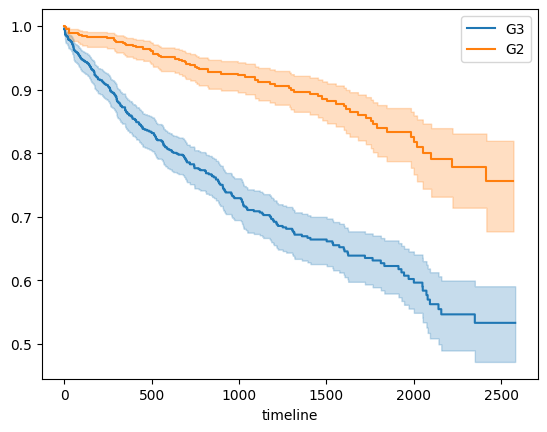

In [12]:
df = df.drop_duplicates()

df.replace(r'^\s*$', np.nan, regex = True, inplace = True)
df['GRADE']=df.apply(replace, axis=1)
print(df['GRADE'].value_counts())
# SurvivalGrade(df, 'G4')
SurvivalGrade(df, 'G3')
SurvivalGrade(df, 'G2')
# SurvivalGrade(df, 'G1')
SurvivalGrade(df, 'GX')
SurvivalGrade(df, 'NA')

plt.xlabel('Time(days)')
plt.ylabel('Survival probability')
plt.title('Survival of GBM patients by different grades')

Median survival G3 :  inf
Median survival G2 :  inf


/tmp/ipykernel_2552872/1063743978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['VITALSTATUS_denull'] = g.apply(conditions, axis=1)
/tmp/ipykernel_2552872/1063743978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['VITALSTATUS_denull'] = g.apply(conditions, axis=1)


ValueError: Values must be numeric: no strings, datetimes, objects, etc.

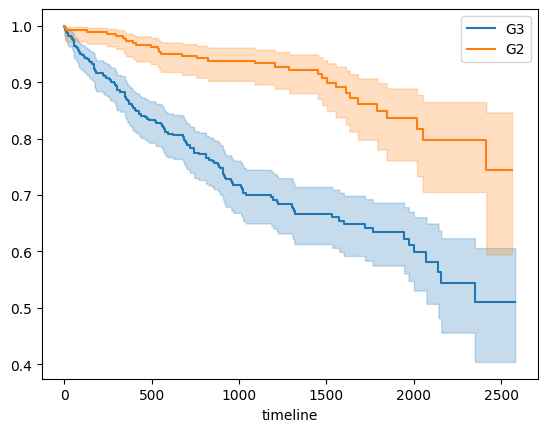

In [14]:
query_male = "SELECT * from TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX = 1) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4))"
df_male = pd.read_sql(query_male,conn)
df_male = df_male.drop_duplicates(subset=['PSEUDO_PATIENTID'])
df_male['GRADE']=df_male.apply(replace, axis=1)
# SurvivalGrade(df_male, 'G4')
SurvivalGrade(df_male, 'G3')
SurvivalGrade(df_male, 'G2')
SurvivalGrade(df_male, 'G1')
SurvivalGrade(df_male, 'GX')
SurvivalGrade(df_male, 'NA')
    
plt.xlabel('Time(days)')
plt.ylabel('Survival probability')
plt.title('Survival of GBM patients by different grades')

Median survival G3 :  inf
Median survival G2 :  inf


/tmp/ipykernel_2552872/1063743978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['VITALSTATUS_denull'] = g.apply(conditions, axis=1)
/tmp/ipykernel_2552872/1063743978.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['VITALSTATUS_denull'] = g.apply(conditions, axis=1)


ValueError: Values must be numeric: no strings, datetimes, objects, etc.

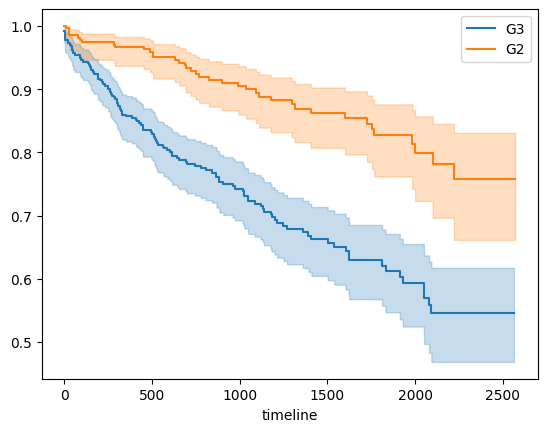

In [15]:
query_female = "SELECT * from TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX = 2) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4))"
df_female = pd.read_sql(query_female,conn)
df_female = df_female.drop_duplicates(subset=['PSEUDO_PATIENTID'])
df_female['GRADE']=df_female.apply(replace, axis=1)
# SurvivalGrade(df_male, 'G4')
SurvivalGrade(df_female, 'G3')
SurvivalGrade(df_female, 'G2')
SurvivalGrade(df_female, 'G1')
SurvivalGrade(df_female, 'GX')
SurvivalGrade(df_female, 'NA')

plt.xlabel('Time(days)')
plt.ylabel('Survival probability')
plt.title('Survival of GBM patients by different grades')

In [16]:
# A bunch of codes about selecting columns
HESDOP=HESNEW[['PSEUDO_PATIENTID','DIAG_', 'OPERTN_', 'INTERVAL_ADMISION_DISCHARGE', 'DAY_FROM_DIAG_TO_OP_', 'ROTREAT']]
HESDOP=HESDOP.drop_duplicates()
HESDOP['DIAG_']=HESDOP['DIAG_'].astype(str)
HESDOP['ICD10']=HESDOP['DIAG_'].astype(str).str[:3]
HESICD=HESDOP[['PSEUDO_PATIENTID','ICD10', 'OPERTN_', 'INTERVAL_ADMISION_DISCHARGE','ROTREAT', 'DAY_FROM_DIAG_TO_OP_',]]
HESICD=HESICD.drop_duplicates()
HESBRAIN=HESICD[HESICD.ICD10.isin(('C70', 'C71', 'C72'))]
HESBRAIN=HESBRAIN.drop_duplicates()

# What surgery code should I use for oligo?
res=("A021","A022","B041","A023","A388 ","A028","A295", "A025","A445","A382","A381","A383","A384", "A024","B012", "A029", "A013", "A443", "A431","A389","A511","A385","A026","A386","A442","B019","A571","A012","A019","B068","V051","A439","A444","A171","A432","A293","A298","A018","A299","A294","V291","A438","B018","A611","C021","A449","V331","V432","V433","V318","A291","V351","A297","B061","V439","V431","A448",  "V339","V319","A441","B014","A069","A068","A296","B013","V312","V438","A598","V074","A292","A011")
biopsy=("A041","A042","A043","A044","A045","A046","A048","A049","A082","A083","A084","A085","A086","A088","A089")
HESRES=HESBRAIN[HESBRAIN.OPERTN_.isin(res)]
HESRES=HESRES.drop_duplicates()

# Looking at the interval from arrival to discharge 
HESADM=HESRES[['PSEUDO_PATIENTID', 'INTERVAL_ADMISION_DISCHARGE', 'ROTREAT']]
HESADM=HESADM.drop_duplicates()

# Replacing empty space with NaN
HESADM['INTERVAL_ADMISION_DISCHARGE'].replace('', np.nan, inplace=True)
# print(len(HESADM))
print('Number of oligo patients that had a major resection:', HESADM['PSEUDO_PATIENTID'].nunique())
# Dropping rows with NaN values
HESADM.dropna(subset=['INTERVAL_ADMISION_DISCHARGE'], inplace=True)
print('NUmber of oligo patients that had a major resection and have an admission discharge interval entered in HES IP:', HESADM['PSEUDO_PATIENTID'].nunique())

# Converting 'INTERVAL_ADMISSION_DISCHARGE' column dtype from object to integer

HESADM['INTERVAL_ADMISION_DISCHARGE']=HESADM['INTERVAL_ADMISION_DISCHARGE'].astype(int)
print('25TH QUANTILE:', HESADM['INTERVAL_ADMISION_DISCHARGE'].quantile(0.25))
print('75TH QUANTILE:',HESADM['INTERVAL_ADMISION_DISCHARGE'].quantile(0.75))
print('Median',HESADM['INTERVAL_ADMISION_DISCHARGE'].median())

Number of oligo patients that had a major resection: 164
NUmber of oligo patients that had a major resection and have an admission discharge interval entered in HES IP: 159
25TH QUANTILE: 1.0
75TH QUANTILE: 3.0
Median 2.0


In [17]:
grouping(df, 'DIAGNOSISYEAR')

DIAGNOSISYEAR
2013    185
2014    215
2015    227
2016    250
2017    228
2018    230
Name: PSEUDO_PATIENTID, dtype: int64

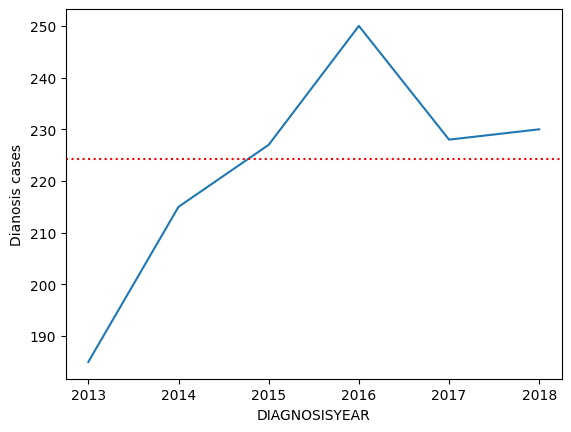

In [18]:
# yearly diagnosis

grouping(df, 'DIAGNOSISYEAR').plot(legend = False)
mean = 224.17
plt.ylabel('Dianosis cases')
plt.axhline(y=mean, color = 'red', linestyle = 'dotted')

Number of patients after cleaning: 1335
Summary for both sex:
       PSEUDO_PATIENTID          AGE
count       1335.000000  1335.000000
mean       25946.934831    47.169288
std        14940.665951    14.403058
min           35.000000    18.000000
25%        13214.000000    36.000000
50%        25478.000000    46.000000
75%        39164.000000    57.000000
max        51744.000000    99.000000


Text(0, 0.5, 'patients count')

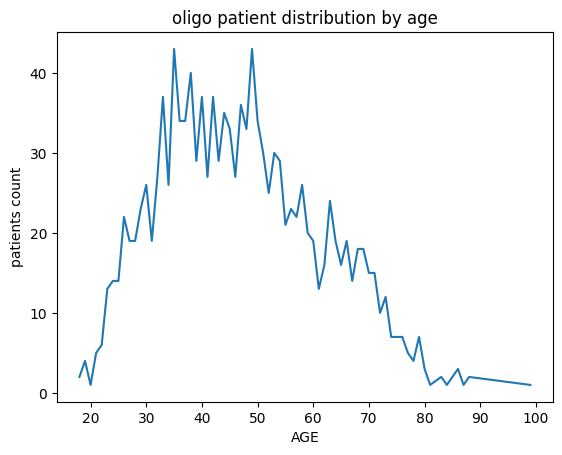

In [19]:
# age distribution 
age=df[['PSEUDO_PATIENTID', 'AGE']]
age=age.drop_duplicates()
print('Number of patients after cleaning:', age['PSEUDO_PATIENTID'].nunique())

age['AGE']=age['AGE'].astype(int)
print('Summary for both sex:') 
print(age.describe())
age.groupby('AGE').count().plot(legend=False)
plt.title('oligo patient distribution by age')
plt.ylabel('patients count')

Number of female patients: 638
Summary:
       PSEUDO_PATIENTID    SEX         AGE
count        638.000000  638.0  638.000000
mean       26270.078370    2.0   47.689655
std        15019.908882    0.0   14.837929
min           35.000000    2.0   19.000000
25%        13480.750000    2.0   36.000000
50%        26274.000000    2.0   46.000000
75%        39697.750000    2.0   58.000000
max        51724.000000    2.0   99.000000


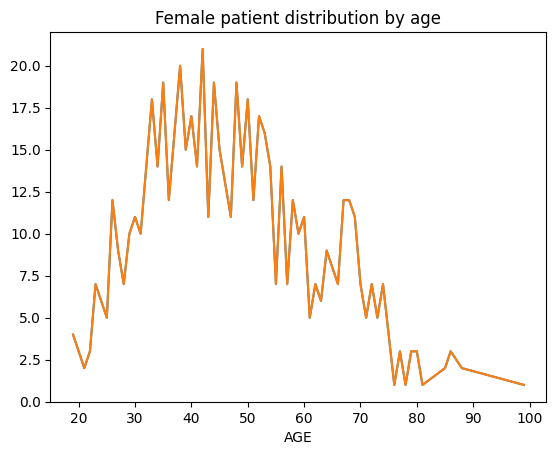

In [20]:
# female age only
fem=pd.read_sql("SELECT * FROM TUM_PAT WHERE (MORPH_ICD10_O2 IN (9450, 9451)) AND (SITE_ICD10_O2 LIKE 'C70_' OR SITE_ICD10_O2 lIKE'C71_' OR SITE_ICD10_O2 LIKE 'C72_') AND (SEX=2) AND (GRADE='G2' OR GRADE='G3' OR GRADE='GX' OR GRADE='');", conn)
fem=fem[['PSEUDO_PATIENTID', 'SEX', 'AGE']]
fem=fem.drop_duplicates()
print('Number of female patients:',len(fem))
fem.groupby('AGE').count().plot(legend=False)
plt.title('Female patient distribution by age')
fem['AGE']=fem['AGE'].astype(int)
print('Summary:') 
print(fem.describe())

Number of male patients: 686
Summary:
       PSEUDO_PATIENTID    SEX         AGE
count        686.000000  686.0  686.000000
mean       25661.746356    1.0   46.317784
std        15051.408264    0.0   13.779956
min           59.000000    1.0   18.000000
25%        12919.250000    1.0   36.000000
50%        24695.000000    1.0   45.000000
75%        39026.000000    1.0   56.000000
max        51744.000000    1.0   87.000000


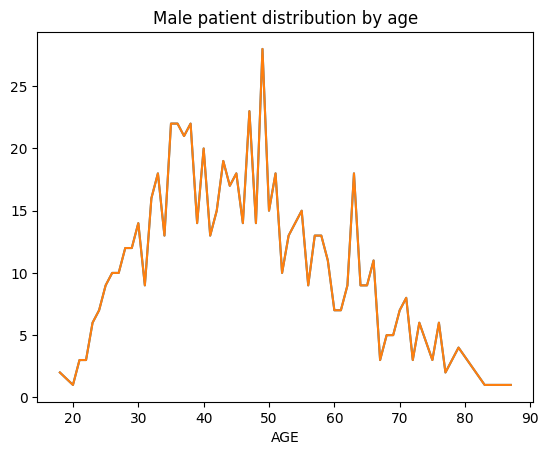

In [21]:
# male patients only
male=pd.read_sql("SELECT * FROM TUM_PAT WHERE (MORPH_ICD10_O2 IN (9450, 9451)) AND (SITE_ICD10_O2 LIKE 'C70_' OR SITE_ICD10_O2 lIKE'C71_' OR SITE_ICD10_O2 LIKE 'C72_') AND (SEX=1) AND (GRADE='G2' OR GRADE='G3' OR GRADE='GX' OR GRADE='');", conn)
male=male[['PSEUDO_PATIENTID', 'SEX', 'AGE']]
male=male.drop_duplicates()
print('Number of male patients:',len(male))
male.groupby('AGE').count().plot(legend=False)
plt.title('Male patient distribution by age')
male['AGE']=male['AGE'].astype(int)
print('Summary:') 
print(male.describe())

In [22]:
df.groupby(['SEX','DIAGNOSISYEAR'])['PSEUDO_PATIENTID'].count()


SEX  DIAGNOSISYEAR
1    2013              84
     2014             106
     2015             126
     2016             139
     2017             126
     2018             113
2    2013             101
     2014             109
     2015             101
     2016             111
     2017             102
     2018             117
Name: PSEUDO_PATIENTID, dtype: int64

In [23]:
##################################### looking into HESAE table ##########################################
HESAE_oligo = pd.read_sql("SELECT * FROM HESAE WHERE PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)

HESAE_oligo.drop_duplicates(subset='PSEUDO_PATIENTID', inplace=True)

bin = [-10000, -90, -60, -30, 0, 30, 60, 90, 180, 365, 1095, 1825, 10000]
label = ['less_than_-3months', 'less_than_-2months', 'less_than_-1month', 'more_than_-1month', 'less_than_1month', 'more_than_1month', 'more_than_2months', 'more_than_3months', 'more_than_0.5yrs', 'more_than_1yr', 'more_than_3yrs', 'more_than_5yrs']
da_group = pd.cut(HESAE_oligo['INTERVAL_DIAG_ARRIVAL'].astype(int), bins = bin, labels = label)

da_group.value_counts(sort=False).to_frame()


,INTERVAL_DIAG_ARRIVAL
less_than_-3months,0
less_than_-2months,63
less_than_-1month,104
more_than_-1month,231
less_than_1month,65
more_than_1month,50
more_than_2months,19
more_than_3months,71
more_than_0.5yrs,144
more_than_1yr,291


In [25]:
HESAE_oligo.groupby('AEINCLOCTYPE')['PSEUDO_PATIENTID'].nunique()

AEINCLOCTYPE
10    477
40     11
50      1
60     69
80      1
91    204
99    420
Name: PSEUDO_PATIENTID, dtype: int64

In [26]:
HESAE_oligo.groupby('AEPATGROUP')['PSEUDO_PATIENTID'].nunique()

AEPATGROUP
10      4
20      1
30      1
40      1
60    153
80    980
99     43
Name: PSEUDO_PATIENTID, dtype: int64

In [27]:
HESAE_oligo.groupby('AEREFSOURCE')['PSEUDO_PATIENTID'].nunique()

AEREFSOURCE
0      49
1     595
3     217
4       1
5       3
6       2
7     144
8     100
93      1
99     71
Name: PSEUDO_PATIENTID, dtype: int64

In [28]:
HESAE_oligo.groupby('AEARRIVALMODE')['PSEUDO_PATIENTID'].nunique()

AEARRIVALMODE
1    584
2    559
9     40
Name: PSEUDO_PATIENTID, dtype: int64

In [29]:
HESAE_oligo.groupby('AEATTENDDISP')['PSEUDO_PATIENTID'].nunique()

AEATTENDDISP
1     524
2     131
3     314
4      15
5      10
6      51
7      29
10      2
11     19
12     10
13      5
14     14
99     59
Name: PSEUDO_PATIENTID, dtype: int64

In [30]:
HESAE_oligo.groupby('AEATTENDCAT')['PSEUDO_PATIENTID'].nunique()

AEATTENDCAT
1    1125
2      12
3      13
9      33
Name: PSEUDO_PATIENTID, dtype: int64

In [31]:
HESAE_oligo.groupby('AEDEPTTYPE')['PSEUDO_PATIENTID'].nunique()

AEDEPTTYPE
1     1067
2       14
3       80
4       19
99       3
Name: PSEUDO_PATIENTID, dtype: int64

In [35]:
ONLY_FOR_INITDUR = pd.read_sql("SELECT * FROM HESAE WHERE INITDUR !='' AND PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)
ONLY_FOR_INITDUR.drop_duplicates(subset='PSEUDO_PATIENTID', inplace=True)

bin = [-60, -30, 0, 30, 60, 90, 180, 365, 1095, 1825, 10000]

aa_group = pd.cut(ONLY_FOR_INITDUR['INITDUR'].astype(int), bins = bin)

aa_group.value_counts(sort=False).to_frame()

,INITDUR
"(-60, -30]",0
"(-30, 0]",93
"(0, 30]",794
"(30, 60]",116
"(60, 90]",45
"(90, 180]",33
"(180, 365]",18
"(365, 1095]",15
"(1095, 1825]",8
"(1825, 10000]",0


In [36]:
ONLY_FOR_CONCLDUR = pd.read_sql("SELECT * FROM HESAE WHERE CONCLDUR !='' AND PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)
ONLY_FOR_CONCLDUR.drop_duplicates(subset='PSEUDO_PATIENTID', inplace=True)

bin = [-60, -30, 0, 30, 60, 90, 180, 365, 1095, 1825, 10000]

aa_group = pd.cut(ONLY_FOR_CONCLDUR['CONCLDUR'].astype(int), bins = bin)

aa_group.value_counts(sort=False).to_frame()

,CONCLDUR
"(-60, -30]",0
"(-30, 0]",0
"(0, 30]",35
"(30, 60]",68
"(60, 90]",80
"(90, 180]",292
"(180, 365]",528
"(365, 1095]",165
"(1095, 1825]",5
"(1825, 10000]",0


In [37]:
ONLY_FOR_DEPDUR = pd.read_sql("SELECT * FROM HESAE WHERE DEPDUR !='' AND PSEUDO_PATIENTID IN (SELECT PSEUDO_PATIENTID FROM TUM_PAT WHERE MORPH_ICD10_O2 IN (9450, 9451) AND (INTERVAL_DIAG_TO_VS != '') AND (VITALSTATUS IN ('A', 'D')) AND (ETHNICITY IN ('A','B', 'C', 'D', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'X', 'Z')) AND (DIAGNOSISYEAR IN (2013,2014,2015,2016,2017,2018)) AND (SEX IN (1,2)) AND (BASISOFDIAGNOSIS IN (1,2,7,9)) AND (BIGTUMOURCOUNT IN (1,2,3,4)));",conn)
ONLY_FOR_DEPDUR.drop_duplicates(subset='PSEUDO_PATIENTID', inplace=True)

bin = [-60, -30, 0, 30, 60, 90, 180, 365, 1095, 1825, 10000]

ad_group = pd.cut(ONLY_FOR_DEPDUR['DEPDUR'].astype(int), bins = bin)

ad_group.value_counts(sort=False).to_frame()

,DEPDUR
"(-60, -30]",0
"(-30, 0]",0
"(0, 30]",28
"(30, 60]",51
"(60, 90]",66
"(90, 180]",220
"(180, 365]",585
"(365, 1095]",225
"(1095, 1825]",8
"(1825, 10000]",0
